# Import Library

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


# Mengunduh dan Memuat Dataset

In [2]:
# Memuat dataset Kaggle Cats & Dogs
dataset_name = "cats_vs_dogs"

# Memisahkan data menjadi data train dan data validation
(train_dataset, val_dataset), dataset_info = tfds.load(
    dataset_name,
    split=["train[:80%]", "train[80%:]"],  # Data 80% untuk training, 20% untuk validation
    as_supervised=True,  # Mengembalikan data dalam bentuk pasangan (image, label)
    with_info=True,  # Mengembalikan metadata dataset
)

# Menampilkan informasi tentang dataset
print(f"Dataset Info: {dataset_info}")
print(f"Number of classes: {dataset_info.features['label'].num_classes}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.2RQ8FA_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Dataset Info: tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmp91jfjcextfds'),
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-

# Preprocessing

In [3]:
# Fungsi untuk preprocessing gambar
def preprocess_image(image, label):
    # Mengubah ukuran gambar menjadi 150x150
    image = tf.image.resize(image, (150, 150))
    # Normalisasi gambar ke rentang [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Menerapkan preprocessing pada data train dan validation
train_dataset = train_dataset.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)


# Membangun Model Neural Network

In [4]:
from tensorflow.keras import layers, models

# Membuat model neural network
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer dengan 1 neuron (binary classification)
])

# Menampilkan informasi tentang jumlah parameter model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

#Menyusun Model

In [5]:
# Menyusun model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimizer Adam dengan learning rate 0.001
    loss='binary_crossentropy',  # Loss function untuk binary classification
    metrics=['accuracy']  # Metrics untuk mengevaluasi akurasi
)


# Melatih Model

In [6]:
# Melatih model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset
)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 952s 2s/step - accuracy: 0.5519 - loss: 0.6850 - val_accuracy: 0.7212 - val_loss: 0.5572
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 947s 2s/step - accuracy: 0.7345 - loss: 0.5355 - val_accuracy: 0.7760 - val_loss: 0.4674
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 948s 2s/step - accuracy: 0.7880 - loss: 0.4530 - val_accuracy: 0.7917 - val_loss: 0.4445
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.8235 - loss: 0.3914 - val_accuracy: 0.8003 - val_loss: 0.4326
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 925s 2s/step - accuracy: 0.8508 - loss: 0.3346 - val_accuracy: 0.7911 - val_loss: 0.4511
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 975s 2s/step - accuracy: 0.8823 - loss: 0.2789 - val_accuracy: 0.8102 - val_loss: 0.4731
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 924s 2s/step - accuracy: 0.9003 - loss: 0.2363 - val_accuracy: 0.8074 - val_loss: 0.5513
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 918s 2s/step - accuracy: 0.9197 - loss: 0.1973 - val_accu

#Menampilkan Kurva Loss dan Akurasi

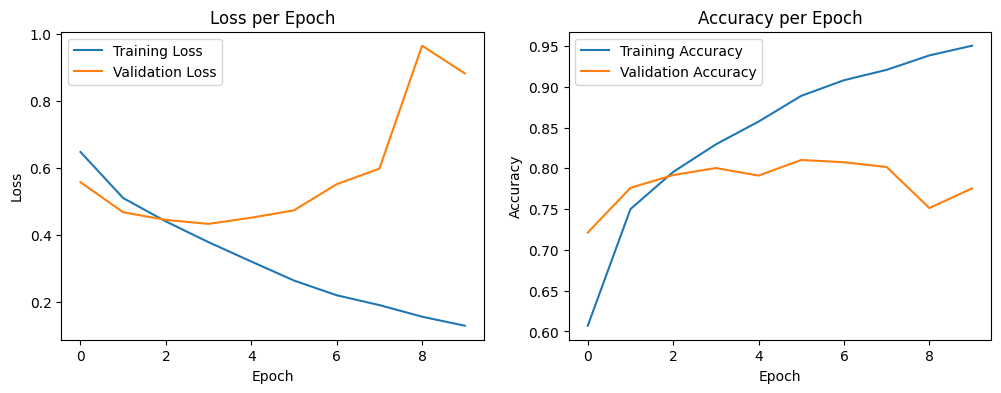

In [7]:
# Menampilkan grafik training dan validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Menampilkan grafik training dan validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#Evaluasi Model

In [8]:
# Evaluasi model pada data validasi
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


146/146 ━━━━━━━━━━━━━━━━━━━━ 73s 498ms/step - accuracy: 0.7753 - loss: 0.8781
Validation Loss: 0.8827295899391174
Validation Accuracy: 0.77536541223526


#Menyimpan Model

In [15]:
# Simpan model ke file .h5
model.save('cats_dogs_classifier.h5')
print("Model saved as cats_dogs_classifier.h5")


Model saved as cats_dogs_classifier.h5
